## Importing libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading csv file 

In [32]:
df = pd.read_csv("/content/income_evaluation.csv",skipinitialspace=True)

In [33]:
# first 5 data points of data frame
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [34]:
# Data preprocessing and visualisations
df=df.drop('fnlwgt', axis=1)

In [35]:
df=df.drop('education', axis=1)

In [36]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [38]:
# Identifying categorical variables

cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 8
Categorical columns:
['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [39]:
# Identifying numerical variables:

num_cols = [x for x in df.select_dtypes(include=["number"]).columns
            if x not in cat_cols
            if x not in ["income"]]
print(f"Number of numerical columns: {len(num_cols)}")
print(f"Numerical columns:\n{num_cols}")

Number of numerical columns: 5
Numerical columns:
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [40]:
#  Checking for missing values:

features_with_na = [col for col in df.columns if df[col].isna().sum() > 0]

# Precentage of missing data
missing_values_df = pd.DataFrame(df[features_with_na].isnull().mean().sort_values(ascending=False), columns=["percentage"])
missing_values_df.head(10)

,percentage


In [41]:
# How many features are missing more than some threshold
print(
    f"25% : {len(missing_values_df[missing_values_df['percentage'] > 0.25])}\n\
50% :  {len(missing_values_df[missing_values_df['percentage'] > 0.50])}\n\
75% :  {len(missing_values_df[missing_values_df['percentage'] > 0.75])}\n\
80% :  {len(missing_values_df[missing_values_df['percentage'] > 0.80])}\n\
90% :  {len(missing_values_df[missing_values_df['percentage'] > 0.90])}\n"
)

25% : 0
50% :  0
75% :  0
80% :  0
90% :  0



In [42]:
df.isna().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [43]:
# Filling in NaN values:

from sklearn.impute import SimpleImputer

# create an imputer object
imputer = SimpleImputer(strategy='mean')

# impute NaN values in numeric columns
numeric_columns = num_cols
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# impute NaN values in categorical columns
categorical_columns = cat_cols
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

- an instance of SimpleImputer is created with the mean strategy to handle missing numeric values. The mean strategy replaces missing values with the mean of the non-missing values along each column. We can also use median or mode

- Next, the fit_transform method of the SimpleImputer object is applied to the DataFrame's numeric columns (num_cols) to replace missing values with the mean value of each column.

- In the last line, the categorical columns (cat_cols) are filled with the string "Unknown" using the fillna method. This method replaces all missing values in categorical columns with the given value.



In [44]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [45]:
label = df['income']

In [46]:
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

# Visualisations

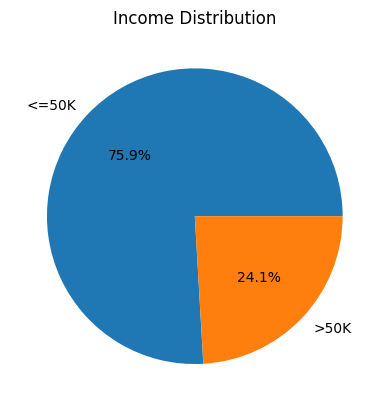

In [50]:
# 1. Target Variable Income:
import matplotlib.pyplot as plt
import pandas as pd

income_counts = df['income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')
plt.title('Income Distribution')
plt.show()

#### 2. Individual features and their relationship with the target variable


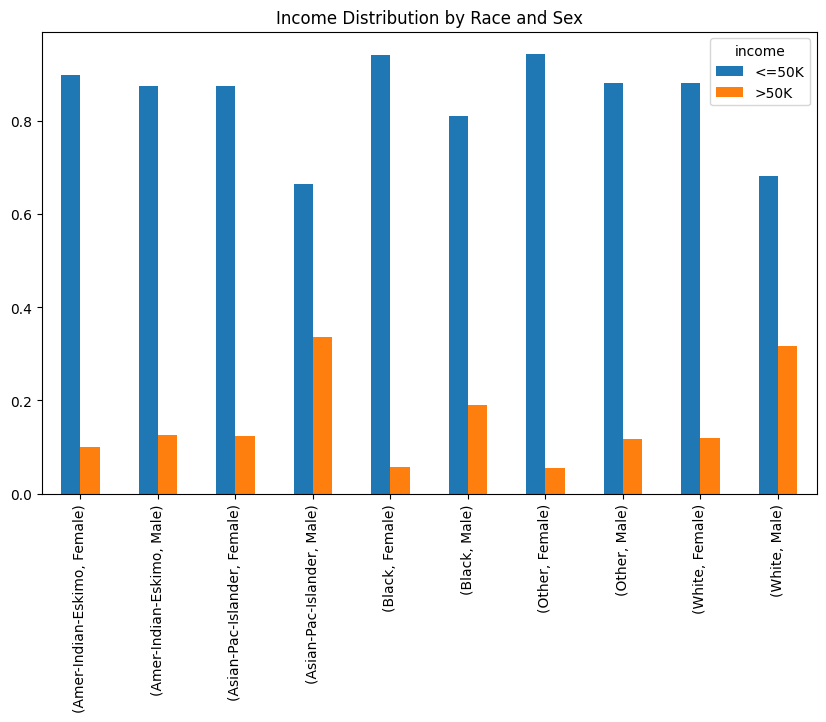

In [57]:
# b) Income distribution by Race and Sex:

ct = pd.crosstab(index=[df['race'], df['sex']], columns=df['income'], normalize='index')
ct.plot(kind='bar', figsize=(10, 6))# create a grouped bar chart
plt.title('Income Distribution by Race and Sex')
plt.xlabel('')
plt.ylabel('')
plt.show()

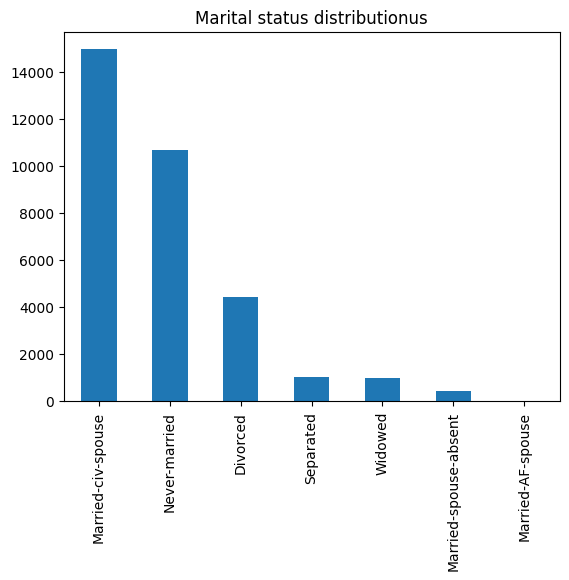

In [58]:
# c) Distribution of marital status:

import matplotlib.pyplot as plt
import pandas as pd

df['marital-status'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('')
plt.title('Marital status distributionus')
plt.show()

<Axes: xlabel='income', ylabel='marital-status'>

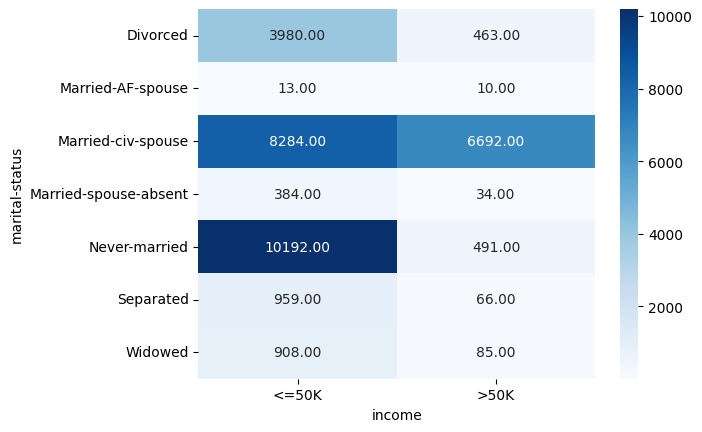

In [59]:
# d) Relationship between marital status and income:



table = pd.crosstab(df['marital-status'], df['income'])
sns.heatmap(table, annot=True, fmt='.2f', cmap='Blues')



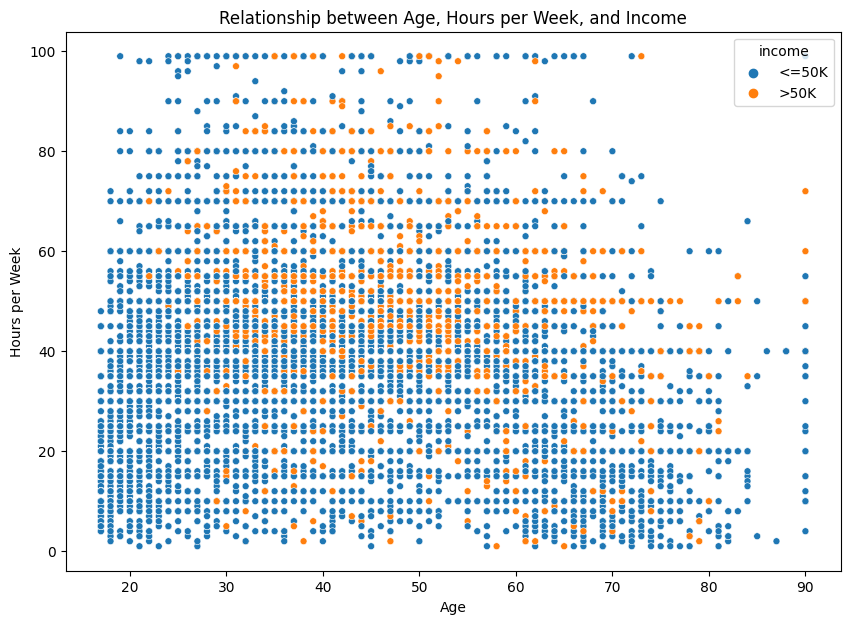

In [60]:
# e) Distribution of income by age and hours worked per week:

plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x= "age", y="hours-per-week", hue="income", s=25)
plt.title("Relationship between Age, Hours per Week, and Income")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.show()

<Axes: xlabel='sex', ylabel='age'>

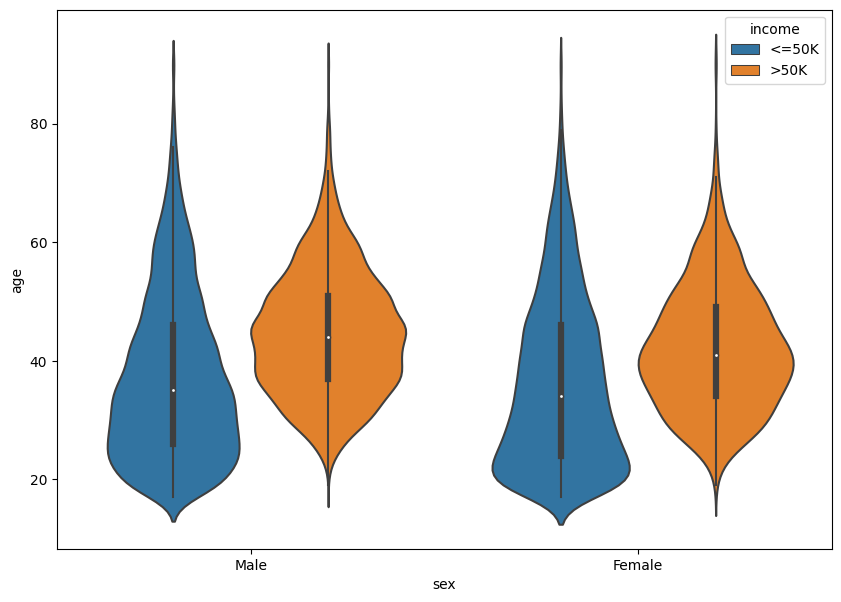

In [61]:
# f) Distribution of income by age and sex


plt.figure(figsize=(10,7))
# create a violin plot with sex on the x-axis, age on the y-axis, and income as the hue
sns.violinplot(data=df, x='sex', y='age', hue='income')

##  Label Encoding:
So that all the variables are in numeric format.

In [62]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [63]:


from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# # encode the target variable
#y = le.fit_transform(df)

# encode categorical variables in the DataFrame
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])



In [64]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,7,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,0
1,50.0,6,13.0,2,4,0,4,1,0.0,0.0,13.0,39,0
2,38.0,4,9.0,0,6,1,4,1,0.0,0.0,40.0,39,0
3,53.0,4,7.0,2,6,0,2,1,0.0,0.0,40.0,39,0
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39,0
32557,40.0,4,9.0,2,7,0,4,1,0.0,0.0,40.0,39,1
32558,58.0,4,9.0,6,1,4,4,0,0.0,0.0,40.0,39,0
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39,0


In [65]:
df.shape

(32561, 13)

In [66]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [79]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,7,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,0
1,50.0,6,13.0,2,4,0,4,1,0.0,0.0,13.0,39,0
2,38.0,4,9.0,0,6,1,4,1,0.0,0.0,40.0,39,0
3,53.0,4,7.0,2,6,0,2,1,0.0,0.0,40.0,39,0
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5,0


## setting target variable:

In [80]:
# target variable
y = df['income']

# Extract the input features
x = df.drop(['income'], axis=1)

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [82]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [83]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(x_train)
x_testf=std.transform(x_test)

In [100]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=12))

model.add(Dense(4,activation="relu"))

model.add(Dropout(0.2))

model.add(Dense(2,activation="relu"))

model.add(Dropout(0.2))

model.add(Dense(1,activation="sigmoid"))

In [101]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5)                 65        
                                                                 
 dense_11 (Dense)            (None, 4)                 24        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_12 (Dense)            (None, 2)                 10        
                                                                 
 dropout_3 (Dropout)         (None, 2)                 0         
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 102
Trainable params: 102
Non-trainable 

In [102]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [103]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=50,validation_split=0.2)

Epoch 1/50
2084/2084 [==============================] - 6s 2ms/step - loss: 0.5685 - accuracy: 0.7673 - val_loss: 0.4748 - val_accuracy: 0.8008
Epoch 2/50
2084/2084 [==============================] - 6s 3ms/step - loss: 0.4636 - accuracy: 0.8067 - val_loss: 0.4259 - val_accuracy: 0.8131
Epoch 3/50
2084/2084 [==============================] - 5s 2ms/step - loss: 0.4554 - accuracy: 0.8084 - val_loss: 0.4176 - val_accuracy: 0.8159
Epoch 4/50
2084/2084 [==============================] - 6s 3ms/step - loss: 0.4490 - accuracy: 0.8104 - val_loss: 0.4157 - val_accuracy: 0.8142
Epoch 5/50
2084/2084 [==============================] - 5s 2ms/step - loss: 0.4505 - accuracy: 0.8100 - val_loss: 0.4148 - val_accuracy: 0.8136
Epoch 6/50
2084/2084 [==============================] - 6s 3ms/step - loss: 0.4461 - accuracy: 0.8121 - val_loss: 0.4169 - val_accuracy: 0.8106
Epoch 7/50
2084/2084 [==============================] - 5s 2ms/step - loss: 0.4506 - accuracy: 0.8095 - val_loss: 0.4075 - val_accuracy:

In [104]:
y_cap=model.predict(x_testf)

204/204 [==============================] - 0s 1ms/step


In [105]:
y_capf=np.where(y_cap>0.5,1,0)

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.8284968524489482

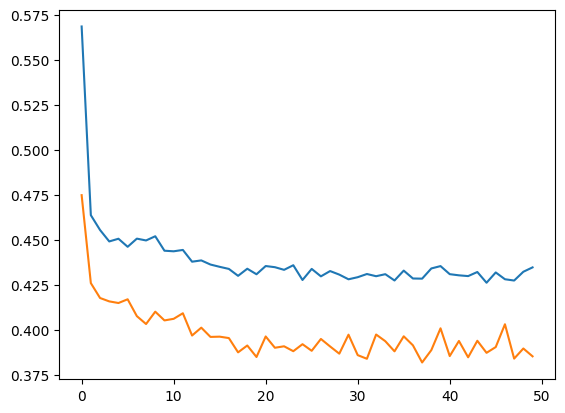

In [107]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])